In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#load the data
import pandas as pd
import numpy as np
import sklearn

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
x_data=data.drop(['Exited'],axis=1)
y_val=data['Exited']

In [5]:
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.shape


(10000, 14)

In [7]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [8]:
dir(data)

['Age',
 'Balance',
 'CreditScore',
 'CustomerId',
 'EstimatedSalary',
 'Exited',
 'Gender',
 'Geography',
 'HasCrCard',
 'IsActiveMember',
 'NumOfProducts',
 'RowNumber',
 'Surname',
 'T',
 'Tenure',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',


In [9]:
data.iloc[1,:]

RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
Name: 1, dtype: object

In [10]:
data.loc[1]

RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
Name: 1, dtype: object

In [11]:
#dealing with missing value
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
#dealing with outliers
import seaborn as sns

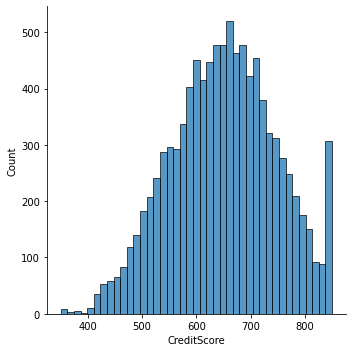

In [15]:
sns.displot(data.CreditScore)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


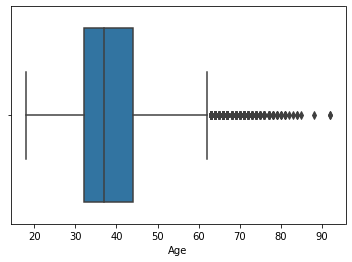

In [14]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


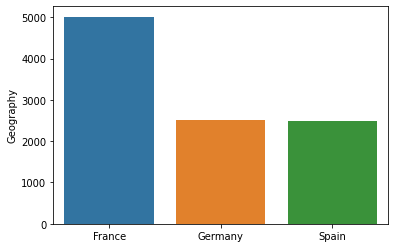

In [17]:
sns.barplot(data.Geography.value_counts().index,data.Geography.value_counts())

In [24]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [26]:
#upper extreme=q3+1.5*IQR
#lower extreme=q1+1.5*IQR
#IQR =q3-q1
qnt=data.quantile(q=[0.25,0.75])

In [27]:
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [28]:
IQR=qnt.loc[0.75]-qnt.loc[0.25]

In [29]:
IQR

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [30]:
upper_extreme=qnt.loc[0.75]+1.5*IQR

In [31]:
upper_extreme

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [32]:
lower_extreme=qnt.loc[0.25]-1.5*IQR

In [33]:
lower_extreme

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [37]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0


In [42]:
from sklearn.preprocessing import LabelEncoder


In [43]:
le=LabelEncoder()

In [49]:
data=data.drop(['CustomerId','Surname','RowNumber'],axis=1)

In [50]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_val,test_size=0.2)

In [57]:
x_train.shape

(8000, 8)

In [58]:
x_test.shape

(2000, 8)